# Telecom Project

In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [273]:
#data = pd.read_csv("TelcomCustomer-Churn.csv")
data1 = pd.read_csv("TelcomCustomer-Churn_1.csv")
data2 = pd.read_csv("TelcomCustomer-Churn_2.csv")

In [274]:
print("data1 shape: ", data1.shape)
print("data1 size: ", data1.size)
print("data2 shape: ", data2.shape)
print("data2 size: ", data2.size)

data1 shape:  (7043, 10)
data1 size:  70430
data2 shape:  (7043, 11)
data2 size:  77473


In [275]:
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [276]:
data2.columns

Index(['OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [277]:
data = data1.join(data2, how = 'inner')

In [278]:
print("data shape: ", data.shape)
print("data size: ", data.size)

data shape:  (7043, 21)
data size:  147903


In [279]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [280]:
data["TotalCharges"] = data["TotalCharges"].astype("float64")

ValueError: could not convert string to float: ''

In [281]:
data["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

In [282]:
def cleanData(data):
    # dealing with blank values in data["TotalCharges"]
    a0 = data.applymap(lambda x: x == ' ')
    data[a0] = np.nan
    for i in np.where(data['TotalCharges'].isnull())[0]:
        data.loc[i,"TotalCharges"] = data.loc[i,"MonthlyCharges"]
    data["TotalCharges"] = data["TotalCharges"].astype("float64")
    # dropping analysis-irrelevant columns 
    if "customerID" in data.columns:
        data = data.drop("customerID", axis = 1)
    data_dummies = data.copy()
    # creating one-hot encoded dummy variables, and dropping redundant columns after analysing heatmap of correlations
    data_dummies = pd.get_dummies(data, columns = [j for j in data.columns.drop('Churn') if data[j].dtypes == "object"])
    dropColumn = ['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 'MultipleLines_No', 'InternetService_No',
                  'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 
                  'StreamingMovies_No', 'Contract_Month-to-month', 'PaperlessBilling_No', 'PaymentMethod_Electronic check',
                  'MultipleLines_No phone service', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 
                  'TechSupport_No internet service', 'StreamingTV_No internet service', 'StreamingMovies_No internet service']
    if dropColumn[0] in data_dummies.columns:
        data_dummies = data_dummies.drop(dropColumn, axis = 1)
    return data_dummies
data = cleanData(data)
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check'],
      dtype='object')

Above we created dummy one-hot variables for each categorical column. Redundant variables after one-hot encoding are dropped using dropColumn. Further, multiple variables indicating no internet service were dropped leaving only one such variable, 'OnlineSecurity_No internet service'.  

In [283]:
data.dtypes

SeniorCitizen                                int64
tenure                                       int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                       object
gender_Male                                  uint8
Partner_Yes                                  uint8
Dependents_Yes                               uint8
PhoneService_Yes                             uint8
MultipleLines_Yes                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
OnlineSecurity_No internet service           uint8
OnlineSecurity_Yes                           uint8
OnlineBackup_Yes                             uint8
DeviceProtection_Yes                         uint8
TechSupport_Yes                              uint8
StreamingTV_Yes                              uint8
StreamingMovies_Yes                          uint8
Contract_One year              

### Data Analysis and Visualization

In [284]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_DSL,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992,0.504756,0.483033,0.299588,0.903166,0.421837,0.343746,...,0.343888,0.290217,0.384353,0.387903,0.209144,0.240664,0.592219,0.219225,0.216101,0.228880
std,0.368612,24.559481,30.090047,2266.730170,0.500013,0.499748,0.458110,0.295752,0.493888,0.474991,...,0.475038,0.453895,0.486477,0.487307,0.406726,0.427517,0.491457,0.413751,0.411613,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can see the 5 point summary, the mean and the standard deviation of the variables in the above dataframe. Most of the variables are binary(0/1). Only the three variables "Tenure", "MonthlyCharges" and "TotalCharges" are continuous. 

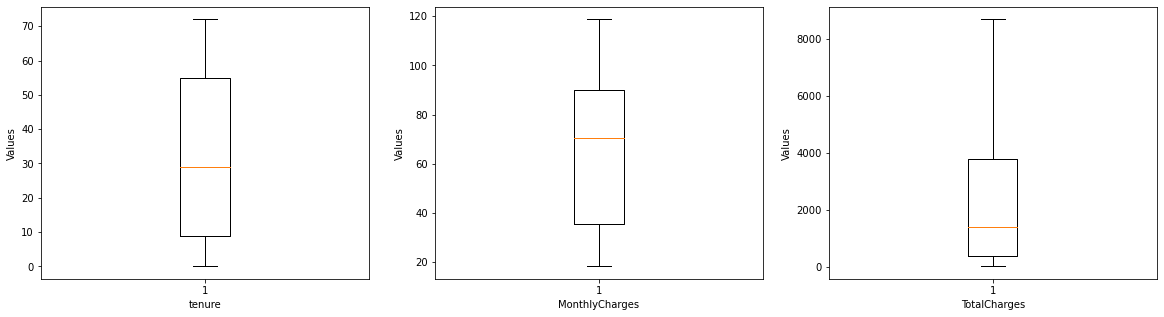

In [285]:
# Generically define how many plots along and across
ncols = 3
nrows = 1
fig, axes = plt.subplots(nrows = nrows, ncols=ncols, figsize=(20, 5))

# Lazy counter so we can remove unwanted axes
counter = 1
for j in range(ncols):
    ax = axes[j]
    # Plot when we have data
    if counter < len(data.columns):
        ax.boxplot(x = data[data.columns[counter]])
        ax.set_xlabel(data.columns[counter])
        ax.set_ylabel('Values')
    # Remove axis when we no longer have data
    else:
        ax.set_axis_off()
    counter += 1
    if counter >= 4:
        break
plt.show()

Boxplots for continuous variables are shown in above. We can notice the predominant skew in TotalCharges. 

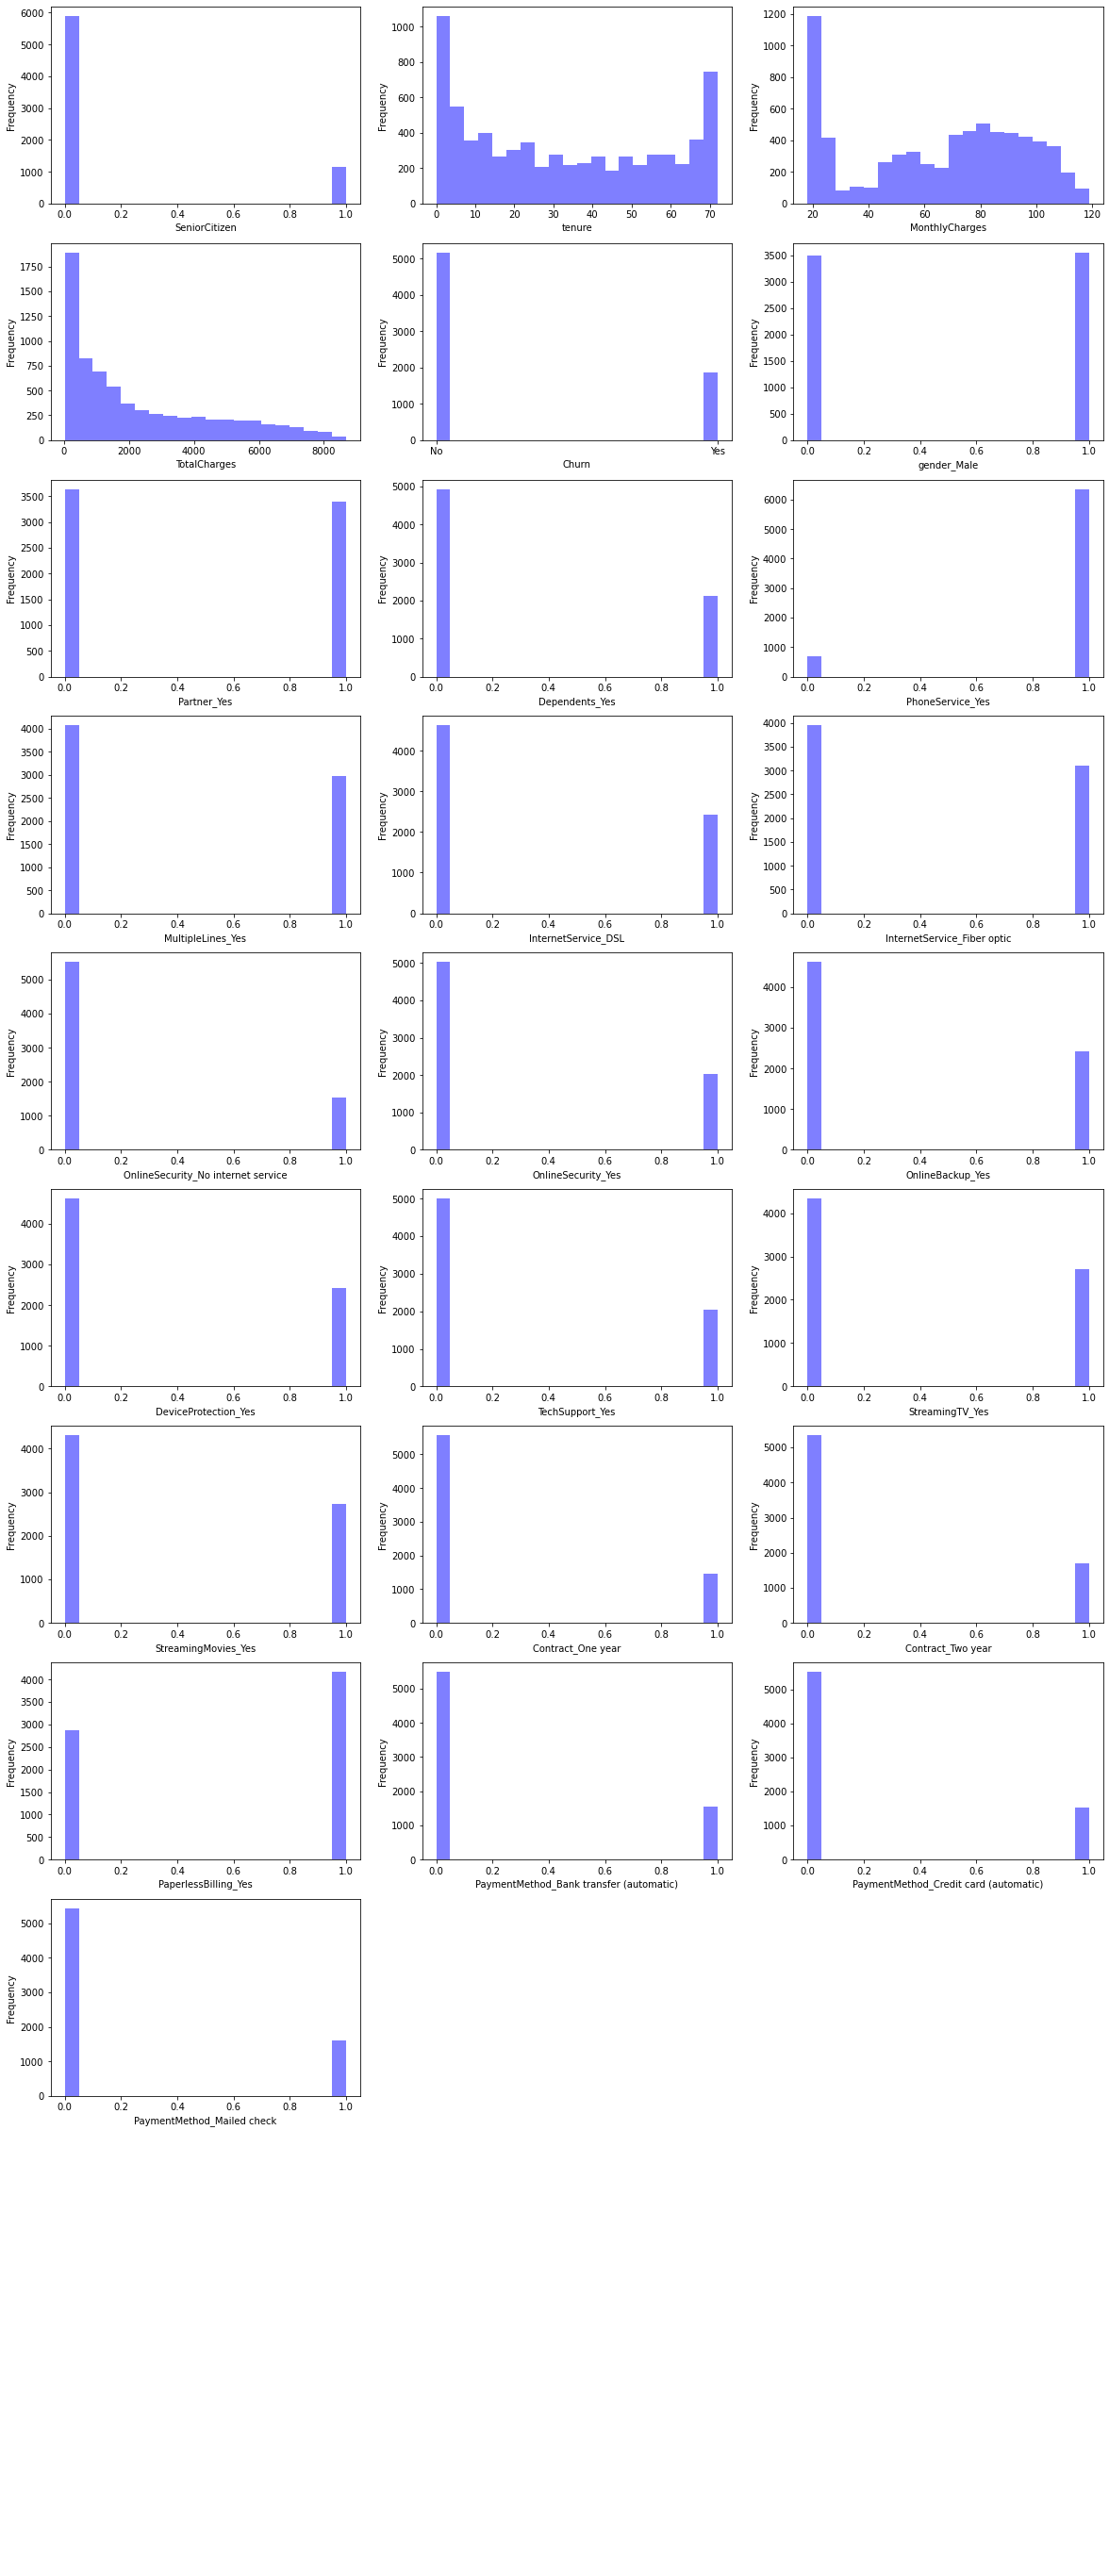

In [286]:
# Generically define how many plots along and across
ncols = 3
nrows = 11
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 50))

# Lazy counter so we can remove unwanted axes
counter = 0
for i in range(nrows):
    for j in range(ncols):

        ax = axes[i][j]

        # Plot when we have data
        if counter < len(data.columns):

            ax.hist(data[data.columns[counter]], bins=20, color='blue', alpha=0.5,
            label='{}'.format(data.columns[counter]))
            ax.set_xlabel(data.columns[counter])
            ax.set_ylabel('Frequency')
        # Remove axis when we no longer have data
        else:
            ax.set_axis_off()

        counter += 1

plt.show()

We see the histograms of the variable values above. Most variables being 0-1 binary, the histograms are concentrated at the two bins at 0 and 1. Histograms of continuous variables are also insightful.  

In [287]:
data.skew()

SeniorCitizen                              1.833633
tenure                                     0.239540
MonthlyCharges                            -0.220524
TotalCharges                               0.963316
gender_Male                               -0.019031
Partner_Yes                                0.067922
Dependents_Yes                             0.875199
PhoneService_Yes                          -2.727153
MultipleLines_Yes                          0.316610
InternetService_DSL                        0.658113
InternetService_Fiber optic                0.243494
OnlineSecurity_No internet service         1.375769
OnlineSecurity_Yes                         0.943722
OnlineBackup_Yes                           0.652817
DeviceProtection_Yes                       0.657450
TechSupport_Yes                            0.924630
StreamingTV_Yes                            0.475581
StreamingMovies_Yes                        0.460199
Contract_One year                          1.430637
Contract_Two

We see the skew of various variables above. Most variables being binary(0/1) skews are not very insightful. It is however insightful for continuous variables.

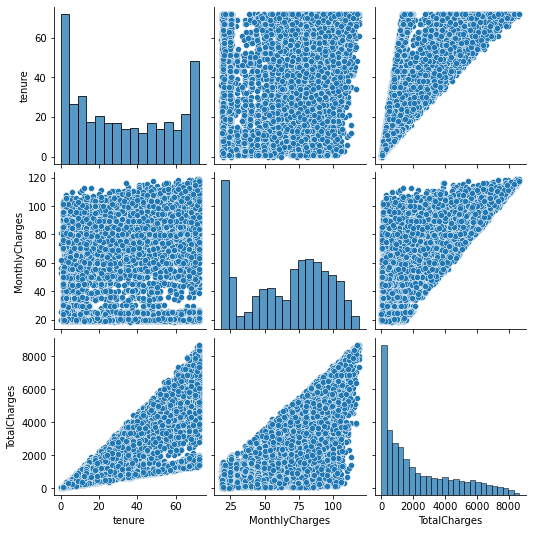

In [288]:
sns.pairplot(data[["tenure","MonthlyCharges","TotalCharges"]])

The pairplot of the continuous variables in the data is given above. We see tenure and Total Charges are somewhat correlated, MonthlyCharges and TotalCharges are also somewhat correlated, whereas Tenure and MonthlyCharges are uncorrelated.

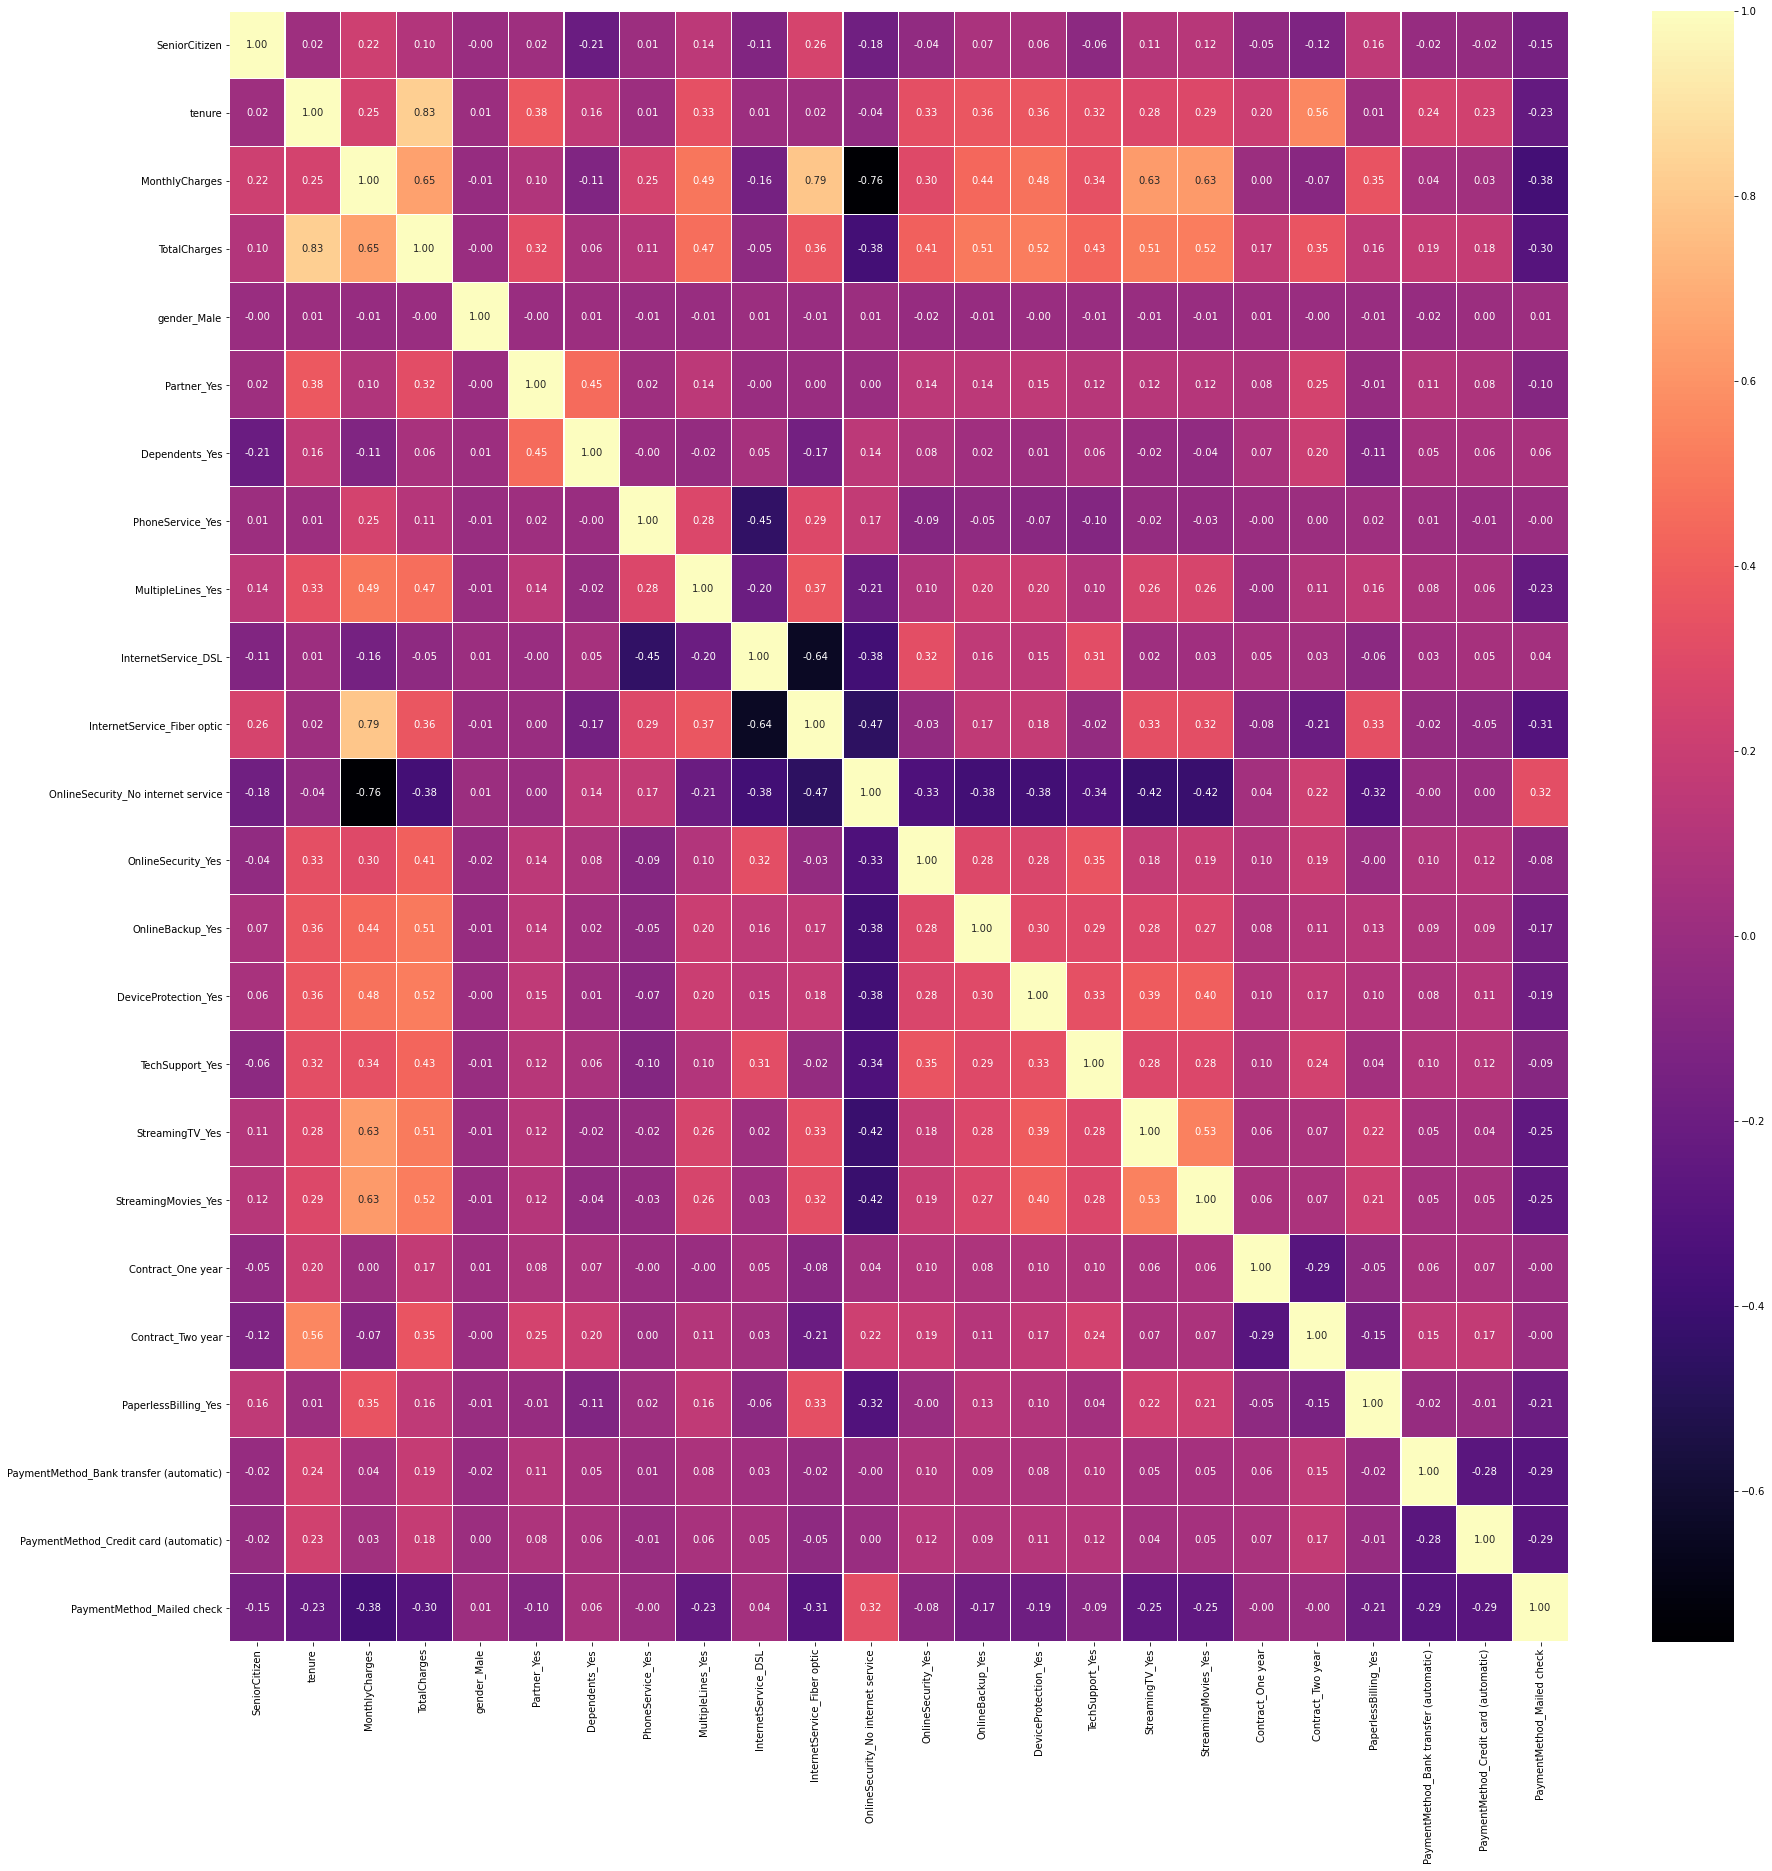

In [289]:
fig, ax = plt.subplots(figsize = (30,30))
sns.heatmap(data.corr(), ax = ax, annot = True, linewidth = 0.05, fmt = '0.2f', cmap = 'magma') # color intensity
plt.show()

The Correlation heatmap is given above it shows most variables are mildly correlated/uncorrelated. Apart from the continuous variables that we saw earlier, internetService_Fiber_optic variable is highly correlated with MonthlyCharges.  

In [290]:
import sklearn.model_selection as ms
from imblearn.over_sampling import RandomOverSampler

In [291]:
X = data[['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']]
y = data['Churn']

In [292]:
mean = X.mean()
std = X.std()
X = (X - mean)/std

<AxesSubplot:xlabel='Churn', ylabel='count'>

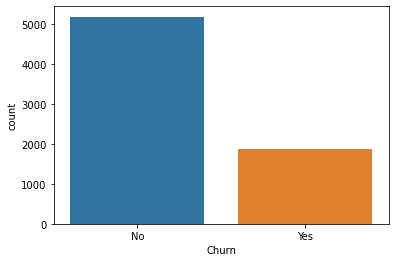

In [293]:
sns.countplot(x=y,data = y)

In [294]:
y = y.replace(['Yes','No'],[1,0])
# y.unique()
y.dtypes

dtype('int64')

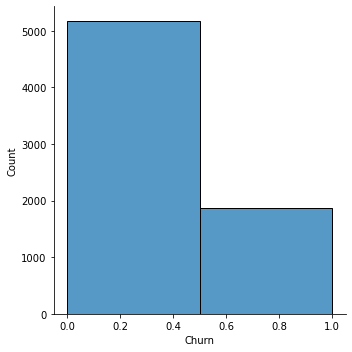

In [295]:
# variables are (0/1) encoded. I pursued this method because regular countplot wasn't functioning properly with integers
sns.displot(x = y, data = y, bins = 2)

In [296]:
oversample = RandomOverSampler(sampling_strategy='minority', random_state = 1)
X_over, y_over = oversample.fit_resample(X, y)

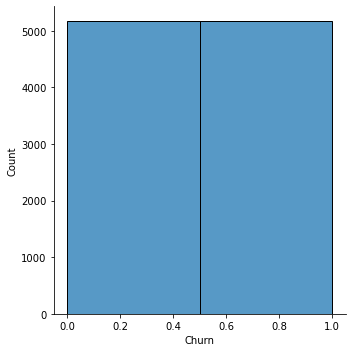

In [297]:
# variables are (0/1) encoded. I pursued this method because regular countplot wasn't functioning properly with integers
sns.displot(x = y_over, data = y_over, bins = 2)

In [298]:
X_train, X_test, y_train, y_test = ms.train_test_split(X_over, y_over, test_size = 0.2, stratify = y_over, random_state=3)

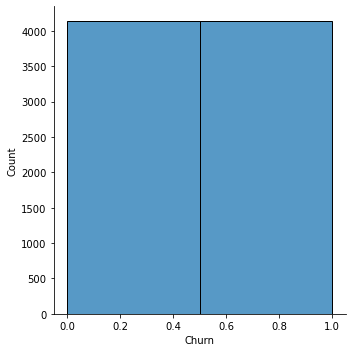

In [299]:
# variables are (0/1) encoded. I pursued this method because regular countplot wasn't functioning properly with integers
sns.displot(x = y_train, data = y_train, bins = 2)

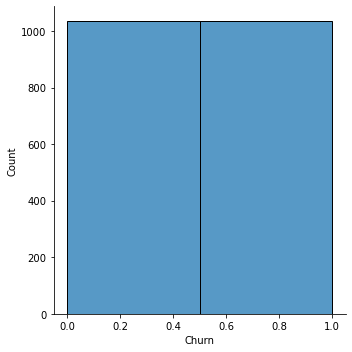

In [300]:
# variables are (0/1) encoded. I pursued this method because regular countplot wasn't functioning properly with integers
sns.displot(x = y_test, data = y_test, bins = 2)

### Training and testing all ensemble modules taught in the learning module

In [301]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9984
Test accuracy score = 0.8686


In [302]:
# Bagging Classifier with logistic regression
lg = LogisticRegression()
bg = BaggingClassifier(base_estimator = lg, random_state=1, n_estimators = 50)
bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
y_pred_train = bg.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.7708
Test accuracy score = 0.7604


In [303]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=1, n_estimators=100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9984
Test accuracy score = 0.9000


In [304]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=1, n_estimators=100)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.7992
Test accuracy score = 0.7773


In [305]:
# Adaptive Boosting Classifier
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
y_pred_train = ab.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.7839
Test accuracy score = 0.7686


In [306]:
# Stacking Classifier
estimators = [('bg',BaggingClassifier(base_estimator = lg, random_state=1,n_estimators = 100)),('rf',RandomForestClassifier(random_state=1, n_estimators=100))]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
sc.fit(X_train, y_train)
y_pred = sc.predict(X_test)
y_pred_train = sc.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9984
Test accuracy score = 0.9150


### Models after hyperparameter tuning

In [307]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=1, min_impurity_decrease = 0.00001, max_features = 12)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_train = dt.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9935
Test accuracy score = 0.8831


In [308]:
# Bagging Classifier with logistic regression
lg = LogisticRegression()
bg = BaggingClassifier(base_estimator = lg, random_state=1, n_estimators = 5)
bg.fit(X_train, y_train)
y_pred = bg.predict(X_test)
y_pred_train = bg.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.7702
Test accuracy score = 0.7609


In [309]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth = 25)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9984
Test accuracy score = 0.9039


In [310]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=1, n_estimators=10000)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_pred_train = gb.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.9984
Test accuracy score = 0.8860


In [311]:
# Adaptive Boosting Classifier
ab = AdaBoostClassifier(n_estimators=10000, random_state=0)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
y_pred_train = ab.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

Train accuracy score = 0.8352
Test accuracy score = 0.7865


In [ ]:
# Stacking Classifier
estimators = [('bg',BaggingClassifier(base_estimator = lg, random_state=1, n_estimators = 5)),('rf',RandomForestClassifier(random_state=1, n_estimators=100))]
sc = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), passthrough = True)
sc.fit(X_train, y_train)
y_pred = sc.predict(X_test)
y_pred_train = sc.predict(X_train)
print("Train accuracy score = %.4f"% accuracy_score(y_train, y_pred_train))
print("Test accuracy score = %.4f"% accuracy_score(y_test, y_pred))

The Stacking Classifier presents us with the highest test accuracy score, and hence is the model of choice. 

In [ ]:
import pickle

In [ ]:
filename = 'StackingClassifierModel'
outfile = open(filename,'wb')
pickle.dump(sc,outfile)
outfile.close()

### Conclusion
We constructed the merged dataset, created an automated data cleansing process, performed statstical analysis on the data, split the data into training and test halves, built 6 different models on them and optimized the models. Finally, we pickled the best model for future use. The best model was Stacking Classifier that had 91.59% accuracy on the test dataset.  

### Improvisation
The following are the suggestions for the research team to perform better data analysis in the future:
1. Collecting more data points would help in better data analysis in the future.
2. Collecting equal number of data points for all classes assists in reducing oversampling of the data thereby making the data analysis more effective.
3. In case the consumer had no internet service, there could have been a single question for this purpose that could have saved some effort in the dummy variable deletion of redundant variables. 